In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LIBRERIAS PARA EL DESCENSO DEL GRADIENTE

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# CARGAMOS NUESTRO DATASET

In [3]:
penguins_df = sns.load_dataset('penguins').dropna()
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# DEFINIMOS VARIABLE DEPENDIENTE E INDEPENDIENTE(x y y)

In [5]:
X = penguins_df[['flipper_length_mm']].values
y = penguins_df['body_mass_g'].values
print(X,y)

[[181.]
 [186.]
 [195.]
 [193.]
 [190.]
 [181.]
 [195.]
 [182.]
 [191.]
 [198.]
 [185.]
 [195.]
 [197.]
 [184.]
 [194.]
 [174.]
 [180.]
 [189.]
 [185.]
 [180.]
 [187.]
 [183.]
 [187.]
 [172.]
 [180.]
 [178.]
 [178.]
 [188.]
 [184.]
 [195.]
 [196.]
 [190.]
 [180.]
 [181.]
 [184.]
 [182.]
 [195.]
 [186.]
 [196.]
 [185.]
 [190.]
 [182.]
 [190.]
 [191.]
 [186.]
 [188.]
 [190.]
 [200.]
 [187.]
 [191.]
 [186.]
 [193.]
 [181.]
 [194.]
 [185.]
 [195.]
 [185.]
 [192.]
 [184.]
 [192.]
 [195.]
 [188.]
 [190.]
 [198.]
 [190.]
 [190.]
 [196.]
 [197.]
 [190.]
 [195.]
 [191.]
 [184.]
 [187.]
 [195.]
 [189.]
 [196.]
 [187.]
 [193.]
 [191.]
 [194.]
 [190.]
 [189.]
 [189.]
 [190.]
 [202.]
 [205.]
 [185.]
 [186.]
 [187.]
 [208.]
 [190.]
 [196.]
 [178.]
 [192.]
 [192.]
 [203.]
 [183.]
 [190.]
 [193.]
 [184.]
 [199.]
 [190.]
 [181.]
 [197.]
 [198.]
 [191.]
 [193.]
 [197.]
 [191.]
 [196.]
 [188.]
 [199.]
 [189.]
 [189.]
 [187.]
 [198.]
 [176.]
 [202.]
 [186.]
 [199.]
 [191.]
 [195.]
 [191.]
 [210.]
 [190.]


# REALIZAMOS UNA NORMALIZACIÓN DE DATOS

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42675157],
       [-1.06947358],
       [-0.42637319],
       [-0.56928439],
       [-0.78365118],
       [-1.42675157],
       [-0.42637319],
       [-1.35529597],
       [-0.71219559],
       [-0.2120064 ],
       [-1.14092917],
       [-0.42637319],
       [-0.283462  ],
       [-1.21238477],
       [-0.49782879],
       [-1.92694075],
       [-1.49820717],
       [-0.85510678],
       [-1.14092917],
       [-1.49820717],
       [-0.99801798],
       [-1.28384037],
       [-0.99801798],
       [-2.06985195],
       [-1.49820717],
       [-1.64111836],
       [-1.64111836],
       [-0.92656238],
       [-1.21238477],
       [-0.42637319],
       [-0.3549176 ],
       [-0.78365118],
       [-1.49820717],
       [-1.42675157],
       [-1.21238477],
       [-1.35529597],
       [-0.42637319],
       [-1.06947358],
       [-0.3549176 ],
       [-1.14092917],
       [-0.78365118],
       [-1.35529597],
       [-0.78365118],
       [-0.71219559],
       [-1.06947358],
       [-0

In [7]:
y_scaled = (y - np.mean(y)) / np.std(y) # normalización manual
y_scaled

array([-0.56847478, -0.50628618, -1.1903608 , -0.94160639, -0.69285199,
       -0.72394629,  0.58201434, -1.2525494 , -0.50628618,  0.23997704,
       -0.63066338, -0.94160639,  0.36435424, -1.0970779 , -0.00877737,
       -1.00379499, -0.75504059, -0.50628618, -0.31972038, -0.50628618,
       -0.50628618, -0.81722919, -1.2525494 , -1.314738  , -0.31972038,
       -1.1903608 , -0.38190898, -1.1281722 , -0.38190898, -1.0970779 ,
       -0.07096597, -0.31972038, -0.81722919, -1.1281722 ,  0.55092004,
       -1.314738  , -0.38190898, -1.3769266 ,  0.23997704, -1.5013038 ,
        0.48873144, -0.97270069, -0.94160639, -0.07096597, -0.87941779,
        0.11559983, -0.94160639, -0.19534317, -1.62568101, -0.63066338,
       -0.81722919, -0.50628618, -1.68786961, -0.56847478, -1.314738  ,
        0.23997704, -0.75504059, -0.19534317, -1.68786961, -0.31972038,
       -1.06598359, -0.13315457, -1.4391152 ,  0.30216564, -0.75504059,
       -0.38190898, -0.81722919, -0.07096597, -0.63066338,  0.05

# DEFINIR EL MODELO DE DESCENSO DEL GRADIENTE

In [8]:
model = SGDRegressor(max_iter=1000,learning_rate='optimal',eta0=0.01)
model.fit(X_scaled,y_scaled)
y_pred = model.predict(X_scaled)
y_pred

array([-1.72045988, -1.32784551, -0.62113963, -0.77818538, -1.01375401,
       -1.72045988, -0.62113963, -1.64193701, -0.93523113, -0.38557101,
       -1.40636838, -0.62113963, -0.46409388, -1.48489126, -0.69966251,
       -2.27012001, -1.79898276, -1.09227688, -1.40636838, -1.79898276,
       -1.24932263, -1.56341413, -1.24932263, -2.42716576, -1.79898276,
       -1.95602851, -1.95602851, -1.17079976, -1.48489126, -0.62113963,
       -0.54261676, -1.01375401, -1.79898276, -1.72045988, -1.48489126,
       -1.64193701, -0.62113963, -1.32784551, -0.54261676, -1.40636838,
       -1.01375401, -1.64193701, -1.01375401, -0.93523113, -1.32784551,
       -1.17079976, -1.01375401, -0.22852526, -1.24932263, -0.93523113,
       -1.32784551, -0.77818538, -1.72045988, -0.69966251, -1.40636838,
       -0.62113963, -1.40636838, -0.85670826, -1.48489126, -0.85670826,
       -0.62113963, -1.17079976, -1.01375401, -0.38557101, -1.01375401,
       -1.01375401, -0.54261676, -0.46409388, -1.01375401, -0.62

# GRAFICAMOS LOS RESULTADOS

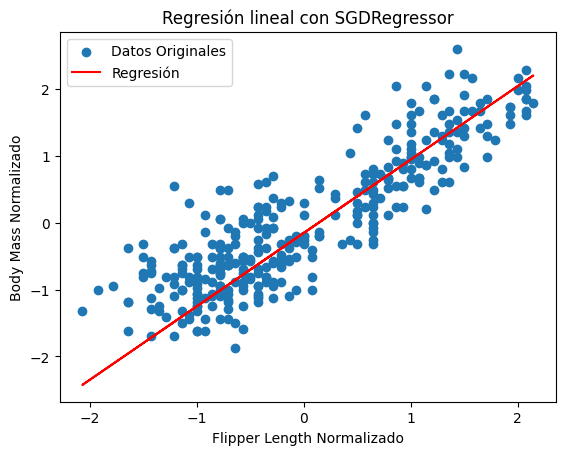

In [9]:
plt.scatter(X_scaled,y_scaled,label='Datos Originales')
plt.plot(X_scaled,y_pred,color='red',label='Regresión')
plt.xlabel("Flipper Length Normalizado")
plt.ylabel("Body Mass Normalizado")
plt.title("Regresión lineal con SGDRegressor")
plt.legend()
plt.show()

# PREDICCIÓN

In [10]:
nuevo_valor = np.array([[210]])
nuevo_valor_scaled = scaler.transform(nuevo_valor)
prediccion_scaled = model.predict(nuevo_valor_scaled)

prediccion_real = prediccion_scaled * np.std(y) + np.mean(y)
print(f'Predicción de Body mass para un flipper_lenght de 210 {prediccion_real}')

Predicción de Body mass para un flipper_lenght de 210 [4654.64993077]
